# Biomedical Data Bases, 2020-2021
### NoSQL Databases
These are the notes by prof. Davide Salomoni (d.salomoni@unibo.it) for the Biomedical Data Base course at the University of Bologna, academic year 2020-2021.

## Consumer notebook

This is the notebook implementing a _consumer_, using PubSub, of the values published to Redis by a generator.

Redis PubSub demo started


<IPython.core.display.Javascript object>


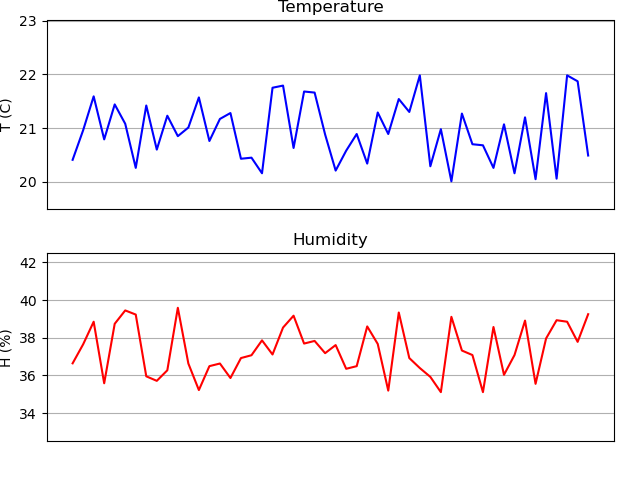

Redis PubSub demo ended


In [16]:
%matplotlib notebook

import time
import redis
from collections import deque
import matplotlib.pyplot as plt

print("Redis PubSub demo started")

reader = redis.Redis(host='my_redis')

# subscribe to a channel
channel = 'experiment'
sub = reader.pubsub(ignore_subscribe_messages=True)  # do not show sub/unsub messages
sub.subscribe(channel)

max_items = 50

x = list(range(max_items)) # the x values
y = [0]*max_items # the initial y values

# use double-ended queues (deque)
t = deque(y, maxlen=max_items)
h = deque(y, maxlen=max_items)

fig, ax = plt.subplots(nrows=2)
fig.tight_layout()

ax[0].set_title('Temperature')
ax[0].set_ylim(19.5,23.0)  # temperature limits
ax[0].set_xticks([])
ax[0].grid(axis='y')
ax[0].set_ylabel('T (C)')

ax[1].set_title('Humidity')
ax[1].set_ylim(32.5,42.5)  # humidity limits
ax[1].set_xticks([])
ax[1].grid(axis='y')
ax[1].set_ylabel('H (%)')

tline, = ax[0].plot(x, y, color='blue')
hline, = ax[1].plot(x, y, color='red')

while True:
    msg = sub.get_message()
    if msg:
        # get data as a string (redis returns bytes, not strings)
        data = msg['data'].decode('utf-8')
        # unpack the data, its format is 'T:H'
        temperature, humidity = [float(i) for i in data.split(':')]
        
        if temperature == -999:
            break  # stop if a special message is received

        # add an element to the left of the queues
        t.appendleft(temperature)
        h.appendleft(humidity)
        tline.set_ydata([item for item in t])
        hline.set_ydata([item for item in h])
        fig.canvas.draw()
        plt.pause(0.05)
    else:
        time.sleep(0.1)

print("Redis PubSub demo ended")